In [52]:
import pandas as pd
import numpy as np
from sklearn import linear_model
randn = np.random.randn
import pandas as pd
from matplotlib import pyplot as plt


df = pd.read_csv("measurements.csv", sep=";", header=None)
m = 10
df = df.transpose()
df.columns = df.iloc[0]
df = df[1:]
df["delta_x"] = (df["5right"] - df["5left"]) / m
df

X = df["L"].to_numpy().reshape(-1, 1)
y = df["delta_x"].to_numpy().reshape(-1, 1)        

model = linear_model.LinearRegression(fit_intercept=False)
model.fit(X=X, y=y)

LinearRegression(fit_intercept=False)

In [59]:
df

,1left,2left,3left,4left,5left,1right,2right,3right,4right,5right,L,delta_x
1,-6,-10,-14,-17,-21,6,9,14,17,20,1005,4.1
2,-5,-8,-12,-16,-19,6,9,13,16,20,905,3.9
3,-5,-8,-11,-14,-17,5,8,11,14,17,805,3.4
4,-4,-6,-9,-12,-15,5,7,10,13,15,705,3.0
5,-3,-5,-7,-10,-12,4,6,9,11,13,605,2.5
6,-2,-4,-6,-8,-10,2,4,6,8,11,505,2.1


## reproduce scikit-learn results with linear algebra

In [53]:
N = len(X)
p = 2  # plus one because LinearRegression adds an intercept term

In [54]:
X_with_intercept = np.empty(shape=(N, p), dtype=np.float64)
X_with_intercept[:, 0] = 1
X_with_intercept[:, 1:p] = X.copy()

In [55]:
beta_hat = np.linalg.inv(X_with_intercept.T @ X_with_intercept) @ X_with_intercept.T @ y.copy()
print(beta_hat)

[[0.017238095238092388]
 [0.0041714285714285655]]


## compute standard errors of the parameter estimates

In [56]:
y_hat = model.predict(X)
residuals = y.copy() - y_hat
residual_sum_of_squares = residuals.T @ residuals
sigma_squared_hat = residual_sum_of_squares[0, 0] / (N - p)
var_beta_hat = np.linalg.inv(X_with_intercept.T @ X_with_intercept) * sigma_squared_hat
for p_ in range(p):
    standard_error = var_beta_hat[p_, p_] ** 0.5
    print(f"SE(beta_hat[{p_}]): {standard_error}")

SE(beta_hat[0]): 0.1555795616396965
SE(beta_hat[1]): 0.00020098778364790044


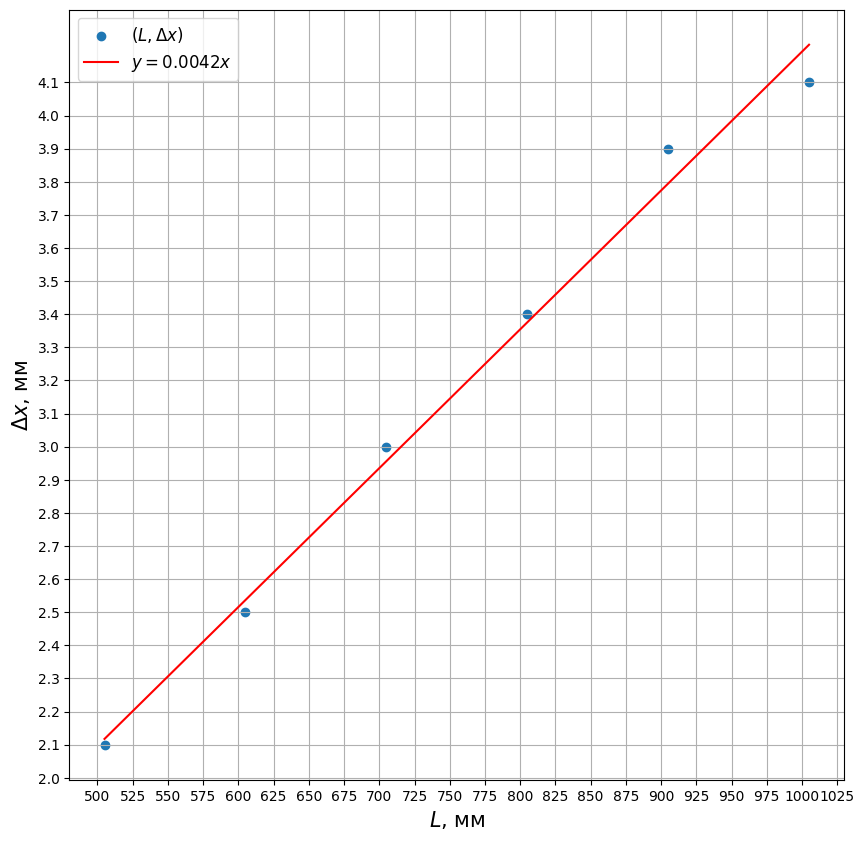

In [57]:
plt.figure(figsize=(10, 10))
plt.xlabel(r"$L$" + ", мм", fontsize=15)
plt.ylabel(r"$\Delta x$" + ", мм", fontsize=15)
plt.xticks(np.arange(0, df["L"].max() + 25, 25))
plt.yticks(np.arange(0, df["delta_x"].max() + 0.1, 0.1))


plt.scatter(df["L"], df["delta_x"], label=r"$(L, \Delta x)$")
X_values = np.arange(df["L"].min(), df["L"].max(), 0.01)
plt.plot(X_values.tolist(), (model.coef_[0][0] * X_values).tolist(), c="r", label=r"$y=0.0042x$")
plt.grid(zorder=-1.0)
plt.legend(fontsize=12)

In [58]:

K = model.coef_[0][0]
delta_K = standard_error * 2
K, delta_K

lambda1 = 632.82 * (10 ** -6)
delta_lambda1 = 0.01 * (10 ** -6)
d = lambda1 / K
delta_d = ((lambda1 * delta_K / (K ** 2)) ** 2 + (delta_lambda1 / K) ** 2) ** 0.5
d, delta_d


(0.15091760019900494, 0.014467691770429437)